In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

%matplotlib inline

plt.rcParams['font.size'] = 20
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

cm = plt.get_cmap('tab10')

In [2]:
train_stat_df = pd.read_csv('./stat-rg-train.csv')
test_stat_df = pd.read_csv('./stat-rg-test.csv')

In [3]:
# PARAMS
_step = 0.01
_plot_max = 0.1
_max_count = 30

In [4]:
_bins = np.arange(0, 1.0, step=_step, dtype=np.float64)

train_hist_counts, train_hist_bins = np.histogram(train_stat_df['ratio'], bins=_bins)
test_hist_counts, test_hist_bins = np.histogram(test_stat_df['ratio'], bins=_bins)


In [5]:
train_hist_data = dict()
test_hist_data = dict()
MAX = _plot_max

for i, (_count, _bin) in enumerate(zip(train_hist_counts, train_hist_bins)):
    if i == len(train_hist_bins) - 1:
        break
    elif _bin >= MAX:
        _name = f'>{int(_bin*100)}%'
        _value = _count
        train_hist_data[_name] = _value
        break
    else:
        # _name = f'[{int(_bin*100)}%, {int(train_hist_bins[i+1]*100)}%)'
        _name = f'{int(_bin*100)}%'
        _value = _count
        train_hist_data[_name] = _value
train_hist_series = pd.Series(train_hist_data)

for i, (_count, _bin) in enumerate(zip(test_hist_counts, test_hist_bins)):
    if i == len(test_hist_bins) - 1:
        break
    elif _bin >= MAX:
        _name = f'>{int(_bin*100)}%'
        _value = _count
        test_hist_data[_name] = _value
        break
    else:
        # _name = f'[{int(_bin*100)}%, {int(test_hist_bins[i+1]*100)}%)'
        _name = f'{int(_bin*100)}%'
        _value = _count
        test_hist_data[_name] = _value
test_hist_series = pd.Series(test_hist_data)

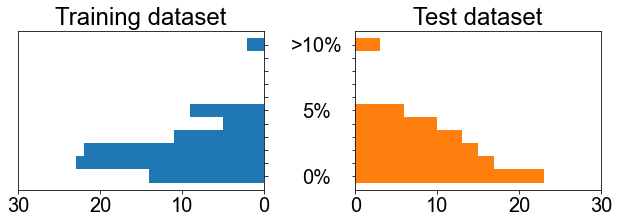

In [8]:
fig = plt.figure(figsize=(9, 3.5), tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1)

ax1.barh(train_hist_series.index, train_hist_series.values, color=cm(0), height=1.0, label='Training data')
ax1.yaxis.tick_right()
ax1.set_yticklabels([])
ax1.set_xlim([_max_count, 0])
ax1.set_title('Training dataset')

ax2 = fig.add_subplot(1, 2, 2)

ax2.barh(test_hist_series.index, test_hist_series.values, color=cm(1), height=1.0, label='Test data')
ax2.tick_params(axis='y', which='major', pad=35)
ax2.set_yticks(test_hist_series.index)
ax2.set_yticklabels([v if i % 5 == 0 else '' for i, v in enumerate(test_hist_series.index)], ha='center')
ax2.set_xlim([0, _max_count])
ax2.set_title('Test dataset')

# plt.show()
plt.savefig('../stat-randam-ht.pdf', bbox_inches='tight', pad_inches=0, backend='pgf')